In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
%matplotlib inline

# Regression

In [2]:
tf.reset_default_graph()

a = tf.Variable(3, name='a')
b = tf.Variable(4, name='b')
f = tf.multiply(a, b)

In [3]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
    print(result)

12


In [4]:
data = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    data.target)

# don't forget to reshape your y to be one column, list o' lists
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Set up X and y placeholders, note that None is the number of rows which is dynamic

In [5]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32,
                   shape=(None, X_train.shape[1]),
                  name = 'X')

y = tf.placeholder(dtype=tf.float32,
                  shape=(None),
                  name='y')
# input layer,13 features input
h1 = tf.layers.dense(X, 13, name='hidden1', activation=tf.nn.relu)
# output layer, 1 output predictor
y_hat = tf.layers.dense(h1, 1, activation=None)

loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
training_op = optimizer.minimize(loss)

Train the model for 10 epochs

In [6]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(10):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, 
                              feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss,
                            feed_dict={X: X_test, y: y_test})
        if epoch % 5 == 0:
            print('epoc', epoch+1,
                  'training loss', train_loss,
                  'test loss', test_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})

epoc 1 training loss 600.062 test loss 574.846
epoc 6 training loss 564.818 test loss 537.271


In [7]:
r2_score(y_test[:, 0], pred[:, 0])

-7.0503772609855471

# Binary Classification



In [8]:
data = load_breast_cancer()

In [9]:
# change 0's to 1' and vice versa, malignant = 1
target = 1 - data.target 
# reshape to a column
target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32,
                   shape=(None, X_train.shape[1]),
                   name='X')

y = tf.placeholder(dtype=tf.float32,
                  shape=(None),
                  name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, 1, name='yhat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

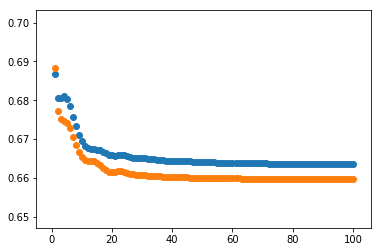

In [11]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    train_loss = []
    test_loss = []
    xs = []
    for epoch in range(100):
        xs.append(epoch+1)
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        pred = sess.run(y_hat, feed_dict={X: X_test})
        train_loss.append(sess.run(loss, feed_dict={X: X_train, y: y_train}))
        test_loss.append(sess.run(loss, feed_dict={X: X_test, y: y_test}))

plt.scatter(xs, test_loss, label='Test Loss')
plt.scatter(xs, train_loss, label='Train_Loss')

In [12]:
kf = KFold(4, shuffle=True, random_state=2003)

batches = []
for train, test in kf.split(X_train, y_train):
    batches.append(test)
len(batches)

4

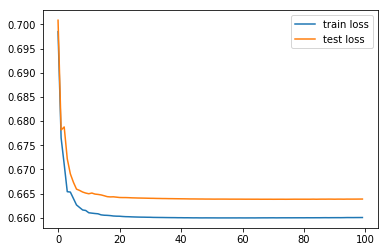

In [13]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,101))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

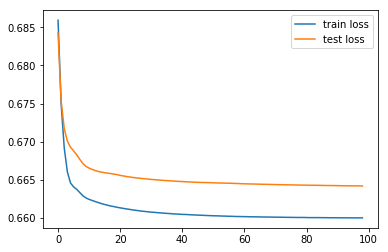

In [14]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
h2 = tf.layers.dense(h1, 30, name='hidden2', activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 30, name='hidden3', activation=tf.nn.relu)
y_hat = tf.layers.dense(h3, 1, name='y_hat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.001)

training_op = optimizer.minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,100))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()